#### Here I am trying to implement a basic binomial model as described in Paul Wilmott Introduces Quantitative Finance

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

##### Introduces variable

In [2]:
S0=100 # Initial Stock Price
K= 100 # Strike Price
T= 1 # Time for maturity in years
r= 0.05 # risk free interest rate
sigma=0.2 # annualised volatility
N=10 # no of steps

# i am keeping the values simple so that i can do the maths manually to crosscheck, later i might change them.

In [3]:
delta_t=T/N # time difference
u= math.exp(sigma*math.sqrt(delta_t)) # up factor
v=1/u# down factor
p= (math.exp(r*delta_t)-v)/(u-v)

So considering all these parameters 
we know,
$$
S_{1,0}=S_0\cdot u^0 \cdot v^1
S_{1,1}=S_0\cdot u^1 \cdot v^0
$$
Extending this further we can say,
$$
S_{i,j} = S_0 \cdot u^j \cdot v^{i-j}
$$
Now payoff functions are:
$$
\text{Call: } \max(S_T - K, 0) \\
\text{Put: } \max(K - S_T, 0)
$$



##### building the tree


In [4]:
# so here we have a choice if you know that the value of N that you take will be less you can just store the entire tree as array and then backtracking is just searching through the list but it will take O(N**2)
# or just store the final value and backtrack using formula which will use lesser storage but same computation overall so choose according to your N
# i am using second one here
j=np.arange(N+1)
stock_prices_T=S0*(u**j)*(v**(N-j))

# payoff function
payoff_call=np.maximum(stock_prices_T-K,0)
payoff_put=np.maximum(K-stock_prices_T,0)

##### Backtracking

Now for backtracking we just discount recursively,
$$
V = e^{-r \Delta t}\big( p \cdot V_{\text{up}} + (1-p)\cdot V_{\text{down}} \big)
$$

In [5]:
payoff_call_copy=payoff_call.copy()
discounting_factor=math.exp(-r*delta_t)
for i in range(N-1,-1,-1):
    value=[]
    for j in range(i+1):
        val=discounting_factor*(p*payoff_call_copy[j+1]+(1-p)*payoff_call_copy[j])
        value.append(val)
    payoff_call_copy=np.array(value)
price_call=payoff_call_copy[0]
print(price_call)

10.25340904487193


In [6]:
payoff_put_copy=payoff_put.copy()
discounting_factor=math.exp(-r*delta_t)
for i in range(N-1,-1,-1):
    value=[]
    for j in range(i+1):
        val=discounting_factor*(p*payoff_put_copy[j+1]+(1-p)*payoff_put_copy[j])
        value.append(val)
    payoff_put_copy=np.array(value)
price_put=payoff_put_copy[0]
print(price_put)

5.376351494943439


##### plotting tree

In [7]:
tree = []
for i in range(N + 1):
    row = [S0 * (u**j) * (v**(i-j)) for j in range(i + 1)]
    tree.append(row)

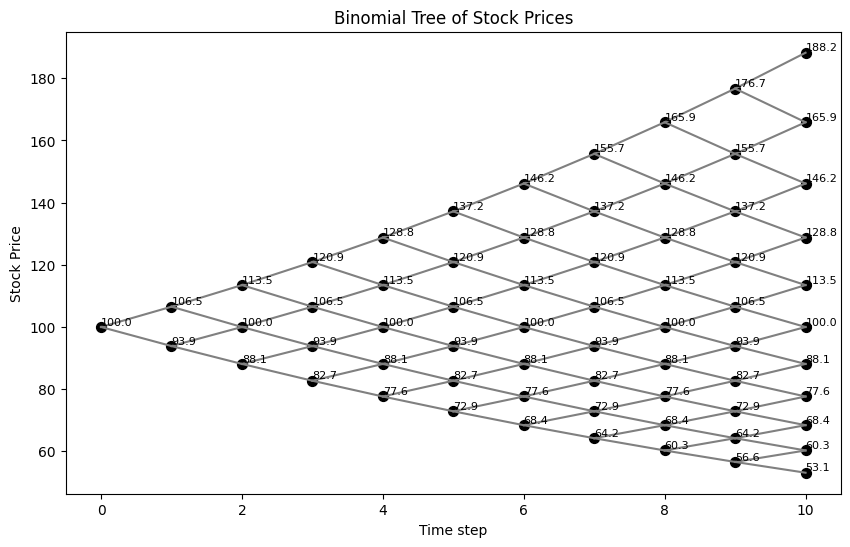

In [8]:
plt.figure(figsize=(10, 6))

for i, row in enumerate(tree):
    for j, price in enumerate(row):
        # x-position: time step
        x = i
        # y-position: stock price
        y = price
        plt.scatter(x, y, color='black', s=50)
        plt.text(x, y, f"{price:.1f}", fontsize=8, ha='left', va='bottom')
        
        # Draw lines to children
        if i < N:
            # Left child (down)
            plt.plot([x, x+1], [tree[i][j], tree[i+1][j]], color='grey')
            # Right child (up)
            plt.plot([x, x+1], [tree[i][j], tree[i+1][j+1]], color='grey')

plt.xlabel("Time step")
plt.ylabel("Stock Price")
plt.title("Binomial Tree of Stock Prices")
plt.show()
